<a href="https://colab.research.google.com/github/hamdan-bot/GIgx-Data-Analytics/blob/main/iphone_sales%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()

# Assuming the uploaded file is a CSV, modify the filename and separator if necessary
filename = list(uploaded.keys())[0]  # Get the filename of the first uploaded file
df = pd.read_csv(io.BytesIO(uploaded[filename]))  # Read the file into a DataFrame

df.info()  # Now you can call df.info()

Saving apple_products.csv to apple_products (3).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product Name         62 non-null     object 
 1   Product URL          62 non-null     object 
 2   Brand                62 non-null     object 
 3   Sale Price           62 non-null     int64  
 4   Mrp                  62 non-null     int64  
 5   Discount Percentage  62 non-null     int64  
 6   Number Of Ratings    62 non-null     int64  
 7   Number Of Reviews    62 non-null     int64  
 8   Upc                  62 non-null     object 
 9   Star Rating          62 non-null     float64
 10  Ram                  62 non-null     object 
dtypes: float64(1), int64(5), object(5)
memory usage: 5.5+ KB


In [ ]:
df.head()

,Product Name,Product URL,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",https://www.flipkart.com/apple-iphone-8-plus-g...,Apple,49900,49900,0,3431,356,MOBEXRGV7EHHTGUH,4.6,2 GB
1,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVAC6TJT4F,4.6,2 GB
2,"APPLE iPhone 8 Plus (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVGETABXWZ,4.6,2 GB
3,"APPLE iPhone 8 (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-silver...,Apple,77000,77000,0,11202,794,MOBEXRGVMZWUHCBA,4.5,2 GB
4,"APPLE iPhone 8 (Gold, 256 GB)",https://www.flipkart.com/apple-iphone-8-gold-2...,Apple,77000,77000,0,11202,794,MOBEXRGVPK7PFEJZ,4.5,2 GB


 1. What are the top 10 highest-rated iPhones on Flipkart India?
\

In [ ]:
top_rated = df.sort_values(by='Star Rating', ascending=False).head(10)
print("\nTop 10 highest-rated iPhones:")
print(top_rated[['Product Name', 'Star Rating', 'Number Of Ratings', 'Sale Price']])


Top 10 highest-rated iPhones:
                                         Product Name  Star Rating  \
15              APPLE iPhone 11 Pro Max (Gold, 64 GB)          4.7   
20    APPLE iPhone 11 Pro Max (Midnight Green, 64 GB)          4.7   
17        APPLE iPhone 11 Pro Max (Space Grey, 64 GB)          4.7   
16   APPLE iPhone 11 Pro Max (Midnight Green, 256 GB)          4.7   
14             APPLE iPhone 11 Pro Max (Gold, 256 GB)          4.7   
0                   APPLE iPhone 8 Plus (Gold, 64 GB)          4.6   
12  Apple iPhone XR (Black, 128 GB) (Includes EarP...          4.6   
11  Apple iPhone XR (Coral, 128 GB) (Includes EarP...          4.6   
9   Apple iPhone XR ((PRODUCT)RED, 128 GB) (Includ...          4.6   
1            APPLE iPhone 8 Plus (Space Grey, 256 GB)          4.6   

    Number Of Ratings  Sale Price  
15               1078      117100  
20               1078      117100  
17               1078      117100  
16               1078      131900  
14               1

How many ratings do the highest-rated iPhones on Flipkart have?

In [ ]:
print("\nNumber of ratings for top-rated iPhones:")
most_reviews = df.sort_values(by='Star Rating', ascending=False).head(1)
print(most_reviews[['Product Name', 'Number Of Ratings']])


Number of ratings for top-rated iPhones:
                             Product Name  Number Of Ratings
15  APPLE iPhone 11 Pro Max (Gold, 64 GB)               1078


 3. Which iPhone has the highest number of reviews on Flipkart?


In [ ]:
most_reviews = df.sort_values(by='Number Of Reviews', ascending=False).head(1)
print("\niPhone with highest number of reviews:")
print(most_reviews[['Product Name', 'Number Of Reviews']])


iPhone with highest number of reviews:
                                         Product Name  Number Of Reviews
23  Apple iPhone SE (White, 256 GB) (Includes EarP...               8161


 4. What is the relationship between the sale price of iPhones and the number of ratings on Flipkart?


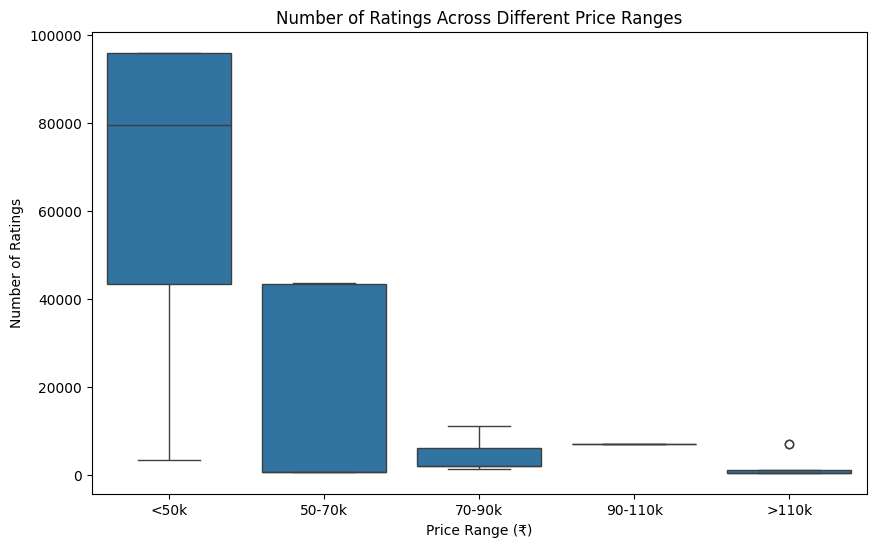

In [ ]:
df['Price Range'] = pd.cut(df['Sale Price'],
                          bins=[0, 50000, 70000, 90000, 110000, 150000],
                          labels=['<50k', '50-70k', '70-90k', '90-110k', '>110k'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Price Range', y='Number Of Ratings')
plt.title('Number of Ratings Across Different Price Ranges')
plt.xlabel('Price Range (₹)')
plt.ylabel('Number of Ratings')
plt.show()

What is the relationship between the discount percentage and the number of ratings of iPhones
 on Flipkart?

<ipython-input-39-c61aa3d04765>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Discount Range', y='Number Of Ratings',ci=None)


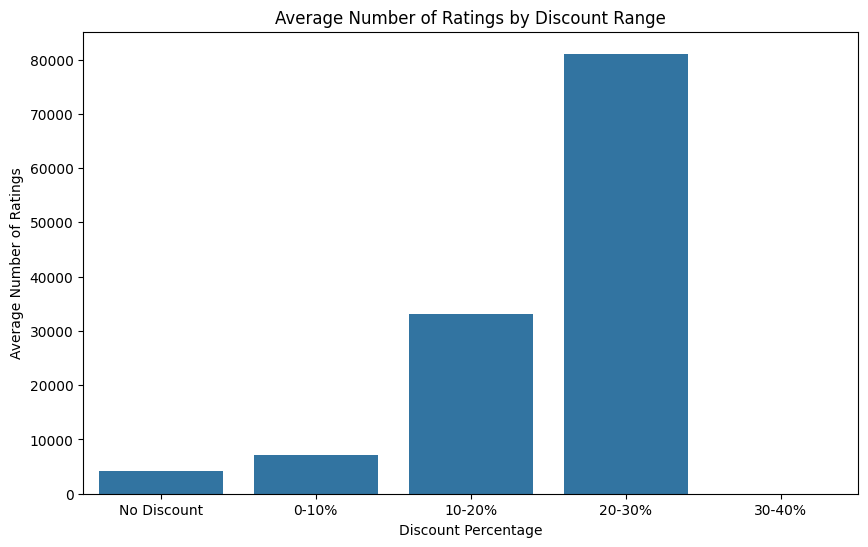

In [ ]:
# Create discount bins
df['Discount Range'] = pd.cut(df['Discount Percentage'],
                             bins=[-1, 0, 10, 20, 30, 40],
                             labels=['No Discount', '0-10%', '10-20%', '20-30%', '30-40%'])

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Discount Range', y='Number Of Ratings',ci=None)
plt.title('Average Number of Ratings by Discount Range')
plt.xlabel('Discount Percentage')
plt.ylabel('Average Number of Ratings')
plt.show()

Can you figure out the least expensive and most expensive iPhones in the Indian market along
 with all their specifications

In [ ]:
least_expensive = df.sort_values(by='Sale Price').head(1)
most_expensive = df.sort_values(by='Sale Price', ascending=False).head(1)

print("\nLeast expensive iPhone:")
print(least_expensive.transpose())

print("\nMost expensive iPhone:")
print(most_expensive.transpose())


Least expensive iPhone:
                                                                    52
Product Name                            APPLE iPhone SE (White, 64 GB)
Product URL          https://www.flipkart.com/apple-iphone-se-white...
Brand                                                            Apple
Sale Price                                                       29999
Mrp                                                              39900
Discount Percentage                                                 24
Number Of Ratings                                                95807
Number Of Reviews                                                 8154
Upc                                                   MOBFWQ6BGWDVGF3E
Star Rating                                                        4.5
Ram                                                               2 GB

Most expensive iPhone:
                                                                    24
Product Name                

In [ ]:
!pip install python-pptx
from pptx import Presentation
from pptx.util import Inches


pptx_path = "contents/presentation.pptx"
# Load existing presentation
prs = Presentation(pptx_path)

# Helper to add image slide
def add_image_slide(prs, title, image_path):
    slide_layout = prs.slide_layouts[5]  # Title Only
    slide = prs.slides.add_slide(slide_layout)
    slide.shapes.title.text = title
    slide.shapes.add_picture(image_path, Inches(1), Inches(1.5), width=Inches(8))

# Add image slides
add_image_slide(prs, "Top 10 Highest-Rated iPhones", plot1_path)
add_image_slide(prs, "Top 10 iPhones with Most Reviews", plot2_path)
add_image_slide(prs, "Sale Price vs Number of Ratings", plot3_path)
add_image_slide(prs, "Discount % vs Number of Ratings", plot4_path)

# Save updated presentation
pptx_with_graphs_path = "/mnt/data/iPhone_Market_Analysis_with_Visuals.pptx"
prs.save(pptx_with_graphs_path)
pptx_with_graphs_path


PackageNotFoundError: Package not found at 'contents/presentation.pptx'